## Importing the required libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold = pd.read_csv('gold_price_data.csv')

In [4]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [8]:
gold.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
## Checking for correlation between the various features
gold_corr = gold.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_15240\123768455.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gold_corr = gold.corr()


<Axes: >

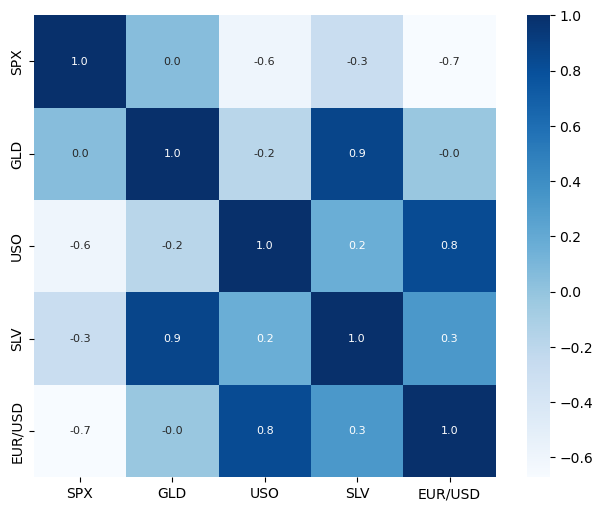

In [12]:
## Plotting the correlation using Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(gold_corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
## Correlation Values of GLD
print(gold_corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_15240\921169217.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

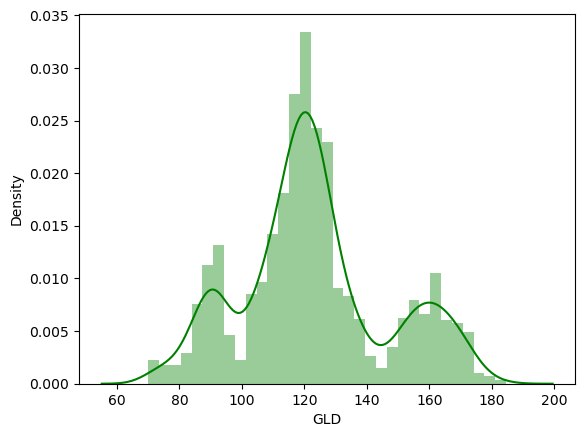

In [14]:
## Checking the distribution of the GLD price
sns.distplot(gold['GLD'], color='green')

## Splitting the Features and Target

In [15]:
X = gold.drop(['Date', 'GLD'], axis=1)
Y = gold['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Splitting into Training Data and Test Data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## Model Training: Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
## Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

## Model Evaluation

In [21]:
## Prediction on Test Data
gold_pred = regressor.predict(X_test)

In [22]:
print(gold_pred)

[168.77249984  82.30849985 115.82120017 127.7217008  120.71180096
 154.64669767 150.28269848 126.11300024 117.4869986  125.86890108
 116.69400107 171.7773012  142.2443987  167.91779905 115.31420013
 117.44510075 138.01540315 170.22280114 159.68410359 158.48829965
 155.15050059 125.38219984 176.33509973 157.46060336 125.2674006
  93.66449961  76.86720031 120.44669997 119.02889876 167.48329983
  88.22130108 125.28530006  90.86290063 117.49090053 121.09569903
 136.61790077 115.83720102 115.45740102 149.08339985 107.11870064
 103.97200229  87.21629785 126.47040056 118.0075002  151.93139881
 119.52060008 108.38799994 107.90959821  93.14100049 127.04239812
  74.65060074 113.69649938 121.38210018 111.35939934 118.96419888
 120.58559957 158.27130089 167.16970036 146.84849668  85.80089839
  94.13980036  86.80469892  90.61130047 118.83810059 126.51900063
 127.45960019 170.83790059 122.20959945 117.26289886  98.66260055
 167.98560061 142.97229879 131.94740222 121.17780196 120.86879921
 119.696600

In [23]:
## R Squared error
error_score= metrics.r2_score(Y_test, gold_pred)
print("R squared error : ", error_score)

R squared error :  0.9880690666382147


## Compare the Actual Values and Predicted Values in a Plot

In [24]:
Y_test = list(Y_test)

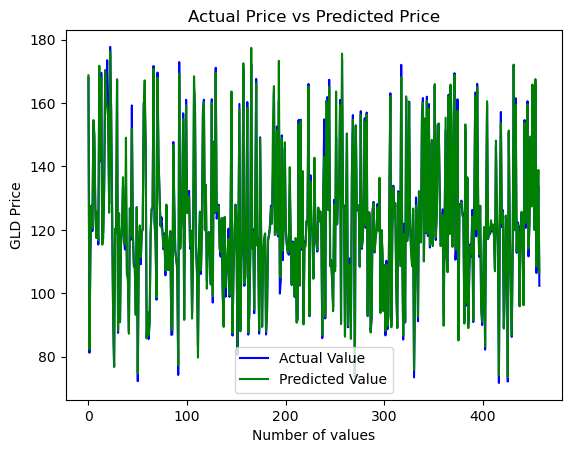

In [25]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(gold_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## Make a Predictive System.

In [26]:
input_data = (1420.329956,88.25,74.019997,16.061001)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print("The price of Gold: ", prediction)

The price of Gold:  [151.05220059]


C:\Users\HP\anaconda3\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
